In [ ]:
!pip3 install wordcloud
!pip3 install seaborn
!pip3 install statsmodels

In [340]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from wordcloud import WordCloud
from statsmodels.tsa.seasonal import seasonal_decompose


In [341]:
def clean_dublicate_date(df):
    df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'geoName'], axis=1)
    df = df.groupby(['date', 'state', 'new_case']).mean()
    df = df.reset_index()
    return df

In [342]:
df = pd.read_csv('final_mvp_usa_df.csv')
df = clean_dublicate_date(df)
df

,date,state,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
0,2020-01-22,Alabama,0,0.0,0.0,0.0,98.0,2.0,20.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,2020-01-22,Alaska,0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Arizona,0,0.0,0.0,0.0,99.0,1.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,2020-01-22,Arkansas,0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,California,0,0.0,0.0,0.0,99.0,1.0,15.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,2021-04-16,Virginia,1608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22997,2021-04-16,Washington,2169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22998,2021-04-16,West Virginia,475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22999,2021-04-16,Wisconsin,903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
df.describe()

,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,muscle aches,body aches,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
count,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,...,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000,23001.000000
mean,1315.771706,56.793357,0.640472,4.114821,36.398483,1.831138,21.247707,34.731838,2.056411,10.161754,...,0.025955,6.470393,4.353398,0.037346,0.111473,0.012630,0.061171,76.169927,9.860615,0.329594
std,2819.155081,27.588476,1.057677,3.581366,27.921714,1.832557,28.138815,34.761591,9.002087,20.611170,...,0.709118,20.394729,16.284974,0.815953,1.450655,0.315855,1.115824,35.078635,17.892672,5.664383
min,-10427.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,39.000000,0.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,422.000000,65.000000,0.000000,4.000000,27.000000,2.000000,0.000000,33.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000
75%,1348.000000,79.000000,1.000000,5.000000,51.000000,3.000000,34.000000,59.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,14.000000,0.000000
max,53711.000000,100.000000,50.000000,58.000000,100.000000,33.000000,100.000000,100.000000,100.000000,100.000000,...,33.000000,100.000000,100.000000,33.000000,100.000000,20.000000,100.000000,100.000000,100.000000,100.000000


In [100]:
def plotly_map_view(df, date, name):
    df_d=df[df.date==date]
    df_d = df_d[df_d.state.duplicated()==False]

    df_usa_code = pd.read_csv('usa_code.csv')
    df_d = df_d.merge(df_usa_code[['ansi_code', 'label']], left_on='state', right_on='label', how='left')
    df_d = df_d[[name, 'ansi_code']]
    return px.choropleth(locations=df_d.ansi_code, locationmode="USA-states", color=df_d[name], range_color=(0, 100), scope="usa")

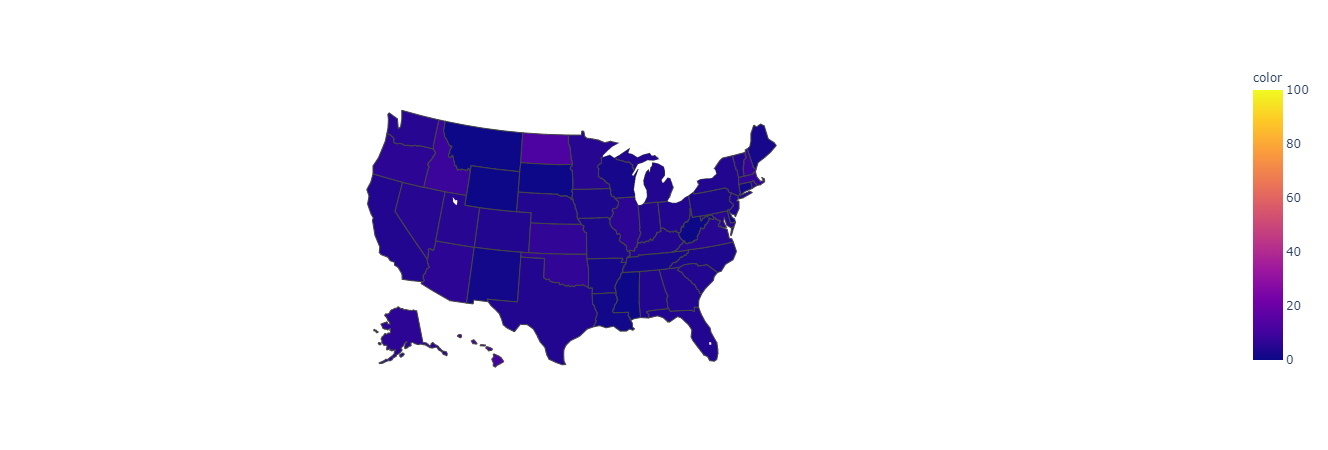

In [101]:
fig = plotly_map_view(df, '2020-03-01', 'Covid')
fig.show()

In [511]:
df[df.columns[3:]].sum().sort_values(ascending=False)

pandemic                1796427.0
Fever                   1581084.0
Covid                   1340087.0
Cough                   1273444.0
sneezing                1026819.0
Shortness of breath      954962.0
Coronavirus              861945.0
Outbreak                 820605.0
Sore throat              790769.0
isolation                500566.0
Fatigue                  374030.0
high temperature         266656.0
body aches               240893.0
epidemic                 234304.0
chills                   156797.0
close contact            152012.0
direct contact           102596.0
Covid-19                  96393.0
can't smell               67294.0
can't taste               63058.0
loss of taste             55693.0
loss of smell             49396.0
muscle aches              48780.0
quarantine                42818.0
can't breath              26535.0
difficulty breathing      26218.0
Covid19                   14957.0
epidemy                    7881.0
cannot taste               3626.0
cannot smell  

In [514]:
wordcloud = WordCloud(background_color='black', colormap='Greens', collocations=False).fit_words(df[df.columns[3:]].sum().sort_values(ascending=False))

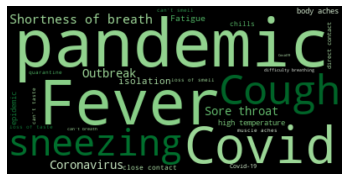

In [515]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [516]:
df_t=df[df.state=='Alabama'].sort_values('date')

In [517]:
df_t

,date,state,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
0,2020-01-22,Alabama,0,0.0,0.0,0.0,98.0,2.0,20.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
51,2020-01-23,Alabama,0,0.0,0.0,0.0,97.0,3.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,2020-01-24,Alabama,0,0.0,0.0,0.0,97.0,3.0,0.0,100.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
153,2020-01-25,Alabama,0,0.0,0.0,0.0,199.0,1.0,33.0,167.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,83.0,0.0
204,2020-01-26,Alabama,0,0.0,0.0,0.0,100.0,0.0,0.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,2021-04-12,Alabama,172,87.0,0.0,8.0,4.0,1.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
22797,2021-04-13,Alabama,282,81.0,0.0,8.0,10.0,1.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
22848,2021-04-14,Alabama,277,81.0,0.0,4.0,14.0,1.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
22899,2021-04-15,Alabama,421,74.0,0.0,6.0,18.0,2.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [336]:
df_t[df_t.columns[:10]].corr()

,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,muscle aches,body aches
new_case,1.000000,0.288642,-0.139304,0.006779,-0.278241,-0.044192,0.100743,-0.031581,0.056359,0.119035
Covid,0.288642,1.000000,-0.244164,0.125539,-0.975816,-0.041970,0.030851,-0.256878,0.042925,0.073789
Covid19,-0.139304,-0.244164,1.000000,0.044174,0.197389,0.078076,0.032481,0.057243,-0.028124,-0.061180
Covid-19,0.006779,0.125539,0.044174,1.000000,-0.245984,0.017212,0.035450,-0.032373,0.004436,0.001941
Coronavirus,-0.278241,-0.975816,0.197389,-0.245984,1.000000,-0.021393,-0.033107,0.265177,-0.039894,-0.065253
quarantine,-0.044192,-0.041970,0.078076,0.017212,-0.021393,1.000000,0.043320,-0.022043,-0.003168,-0.025463
isolation,0.100743,0.030851,0.032481,0.035450,-0.033107,0.043320,1.000000,-0.226953,-0.042988,-0.109643
Outbreak,-0.031581,-0.256878,0.057243,-0.032373,0.265177,-0.022043,-0.226953,1.000000,-0.076679,-0.171684
muscle aches,0.056359,0.042925,-0.028124,0.004436,-0.039894,-0.003168,-0.042988,-0.076679,1.000000,0.010485
body aches,0.119035,0.073789,-0.061180,0.001941,-0.065253,-0.025463,-0.109643,-0.171684,0.010485,1.000000


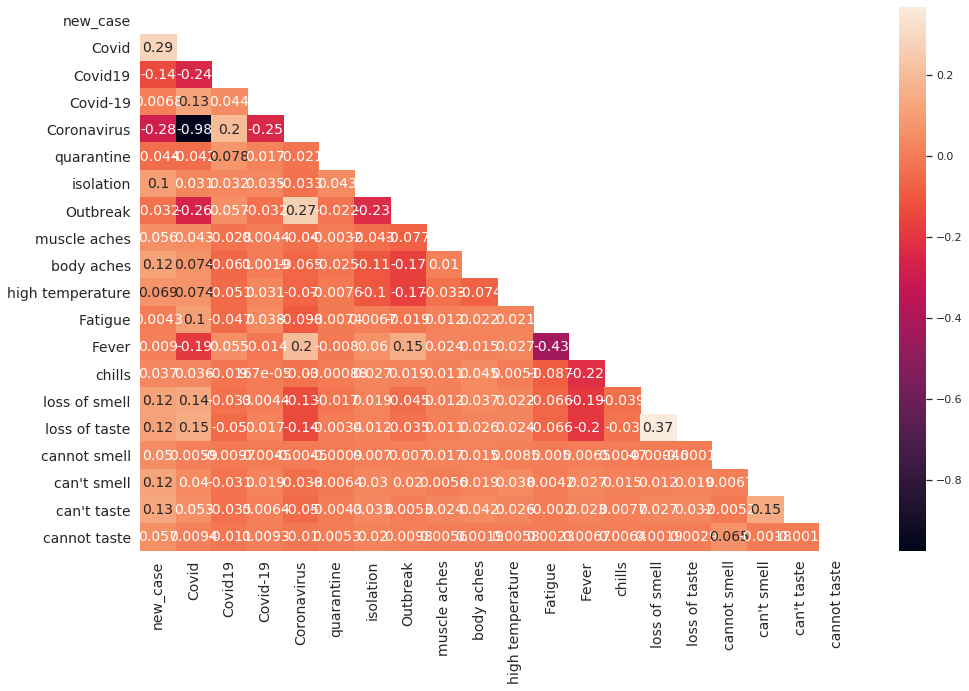

In [339]:
df_t = df.drop(['date', 'state'], axis=1)
df_t = df_t[df_t.columns[:20]]
mask = np.zeros_like(df_t.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(df_t.corr(), mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

,new_case,Covid,Covid19,Covid-19,Coronavirus,quarantine,isolation,Outbreak,muscle aches,body aches,...,casual contact,close contact,direct contact,mild cold symptoms,mild cold,flu-like symptoms,flu-like,pandemic,epidemic,epidemy
0,0,0.0,0.0,0.0,98.0,2.0,20.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,99.0,1.0,33.0,0.0,34.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,99.0,1.0,15.0,77.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,1608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22997,2169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22998,475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22999,903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Пробуем предсказать с помощью sklearn

In [229]:
df = df.set_index('date').sort_index()

In [95]:
point_sel = int(len(df) * 0.8)
train_df = df[:point_sel]
test_df = df[point_sel:]

In [38]:
test_df.shape

(4601, 38)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [210]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [302]:
df_t = X_train_df
#df_t = X_test_df
df_fuck = series_to_supervised(df_t[df_t.columns[1:]])

In [303]:
df_fuck = df_fuck.values

n_train_point = point_sel = int(len(df_fuck) * 0.8)
train = df_fuck[:n_train_point, :]
test = df_fuck[n_train_point:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(288, 1, 73) (288,) (72, 1, 73) (72,)


In [309]:
train[150]

array([532.,  51.,   0.,   8.,  40.,   1.,   0.,   0.,  50.,   0.,  50.,
         0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,
         0.,   0.,  67.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 100.,   0.,   0., 472.,  52.,   0.,   9.,  38.,   1.,  50.,
         0.,   0.,   0.,  50.,  12.,  76.,  12.,   0.,   0.,   0.,   0.,
         0.,   0., 100.,   0.,   0.,   0.,  60.,  40., 100.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  80.,  20.,   0.])

In [271]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=14, validation_data=(test_X, test_y), verbose=1, shuffle=False)

Train on 71 samples, validate on 18 samples
Epoch 1/10
71/71 [==============================] - 0s 205us/step - loss: 0.4982 - val_loss: 0.4521
Epoch 2/10
71/71 [==============================] - 0s 386us/step - loss: 0.2281 - val_loss: 0.2142
Epoch 3/10
71/71 [==============================] - 0s 204us/step - loss: 0.1708 - val_loss: 0.2360
Epoch 4/10
71/71 [==============================] - 0s 224us/step - loss: 0.1395 - val_loss: 0.2465
Epoch 5/10
71/71 [==============================] - 0s 212us/step - loss: 0.1273 - val_loss: 0.2553
Epoch 6/10
71/71 [==============================] - 0s 222us/step - loss: 0.1056 - val_loss: 0.2728
Epoch 7/10
71/71 [==============================] - 0s 210us/step - loss: 0.0939 - val_loss: 0.2934
Epoch 8/10
71/71 [==============================] - 0s 227us/step - loss: 0.0957 - val_loss: 0.2878
Epoch 9/10
71/71 [==============================] - 0s 236us/step - loss: 0.0879 - val_loss: 0.2718
Epoch 10/10
71/71 [==============================] - 0s 

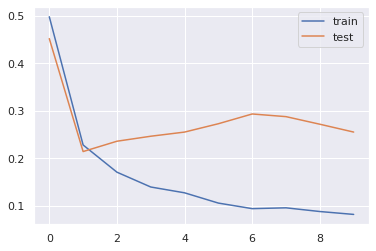

In [272]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [275]:
from sklearn.metrics import mean_squared_error

In [293]:
# make a prediction
test_X=train_X
test_y=train_y
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.172


In [304]:
test_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

array([[1.381e+03, 6.700e+01, 0.000e+00, 5.000e+00, 2.500e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01,
        6.300e+01, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+01, 5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.700e+01, 3.300e+01,
        0.000e+00, 1.556e+03, 7.800e+01, 0.000e+00, 6.000e+00, 1.500e+01,
        1.000e+00, 0.000e+00, 7.500e+01, 0.000e+00, 0.000e+00, 2.500e+01,
        1.800e+01, 6.400e+01, 0.000e+00, 9.000e+00, 9.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.500e+01, 2.500e+01, 1.000e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.700e+01,
        3.300e+01]])

In [295]:
X_train_df = train_df[train_df.state=='Alabama']
X_test_df = test_df[test_df.state=='Alabama']

In [131]:
len(X_train_df.new_case.values.reshape(-1,1))

361

In [141]:
X_train_df.new_case=MinMaxScaler(feature_range=(0, 100)).fit_transform(abs(X_train_df.new_case.values.reshape(-1,1)))

In [216]:
X = X_train_df[train_df.columns[1:]].values
scaler = MinMaxScaler().fit(X)
X_norm = scaler.transform(X)

In [42]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [215]:
X_train=create_dataset(X_norm[:, 1], 1)

361 1


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [44]:
X_norm[:, 1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04494382, 0.04494382, 0.03370787,
       0.02247191, 0.03370787, 0.        , 0.03370787, 0.07865169,
       0.        , 0.        , 0.01123596, 0.05617978, 0.02247191,
       0.02247191, 0.01123596, 0.01123596, 0.04494382, 0.04494382,
       0.04494382, 0.08988764, 0.04494382, 0.04494382, 0.04494382,
       0.05617978, 0.06741573, 0.08988764, 0.07865169, 0.08988764,
       0.08988764, 0.08988764, 0.11235955, 0.11235955, 0.14606742,
       0.15730337, 0.16853933, 0.19101124, 0.17977528, 0.19101124,
       0.19101124, 0.24719101, 0.2247191 , 0.2247191 , 0.24719101,
       0.26966292, 0.2247191 , 0.24719101, 0.28089888, 0.29213483,
       0.25842697, 0.3258427 , 0.28089888, 0.24719101, 0.26966

In [45]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, X_norm)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

TypeError: only size-1 arrays can be converted to Python scalars

In [175]:
reg = LinearRegression().fit(X_norm[:, 1:], X_norm[:, 0])

In [176]:
reg.score(X_norm[:, 1:], X_norm[:, 0])

0.6021080597850346

In [177]:
reg.coef_

array([ 3.80151075e+12,  1.26331995e+11,  4.78463867e+11,  3.96705688e+12,
        1.88523498e+11, -3.34777832e-02,  7.00683594e-02,  1.03683472e-02,
        6.22558594e-02,  2.57568359e-02,  1.49475427e+12,  1.91607652e+12,
        1.13725292e+12,  6.79592997e+11,  6.80535495e+11, -1.23790722e+11,
        3.06091309e-02,  3.90625000e-03,  9.03787579e+11,  7.73925781e-02,
       -7.13806152e-02, -5.95092773e-02, -3.85226025e+11, -7.38525391e-02,
       -1.17919922e-01,  1.53121948e-02,  8.06833138e+09, -1.08642578e-02,
        2.76947021e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.77917480e-02,  2.38647461e-02,  3.96728516e-02,  0.00000000e+00])

In [178]:
test = X_test_df[X_test_df.columns[1:]].values
test_norm = scaler.transform(test)

In [179]:
y_pred=reg.predict(test_norm[:, 1:])

In [180]:
y_pred

array([ 6.93589048e-01,  8.79133310e-01,  9.36887667e-01,  1.23527427e+00,
        1.22990559e+00,  1.07306265e+00,  1.32196858e+00,  8.30491071e-01,
        6.83317949e-01,  9.48076443e-01,  1.26604634e+00,  1.00453206e+00,
        1.22096139e+00,  7.46999251e-01,  6.95812146e-01,  1.20066570e+00,
        1.23780224e+00,  1.13057264e+00,  1.06431981e+00,  7.94155912e-01,
        1.09548829e+00,  1.24770500e+00,  6.13956180e-01,  1.23000749e+00,
        1.06975930e+00,  1.10073997e+00,  1.28123890e+00,  1.12230015e+00,
        1.14373254e+00,  1.36335525e+00,  1.12445766e+00,  8.76803371e-01,
        1.00084300e+00,  1.36729808e+00,  1.30614909e+00,  1.12140069e+00,
        7.00762458e-01,  1.15497266e+00,  9.66173514e-01,  9.28342201e-01,
        1.03335140e+00,  1.06455963e+00,  1.40764141e+00,  1.02907882e+00,
        1.17356500e+00,  8.03139000e-01,  9.97544845e-01,  1.20327963e+00,
        1.03457256e+00,  1.35281503e+00,  6.73566290e-01,  6.60481523e-01,
        8.79080318e-01,  

In [181]:
reg.score(test_norm[:, 1:], test_norm[:, 0])

-4.831959350242354e+21

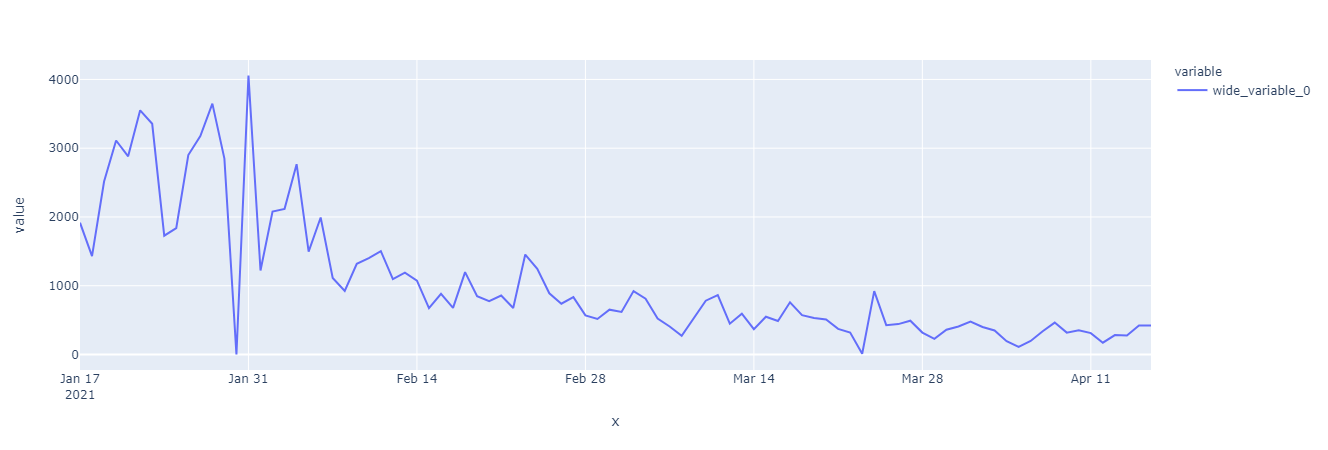

In [182]:
px.line(x=X_test_df.index, y = [X_test_df.new_case])

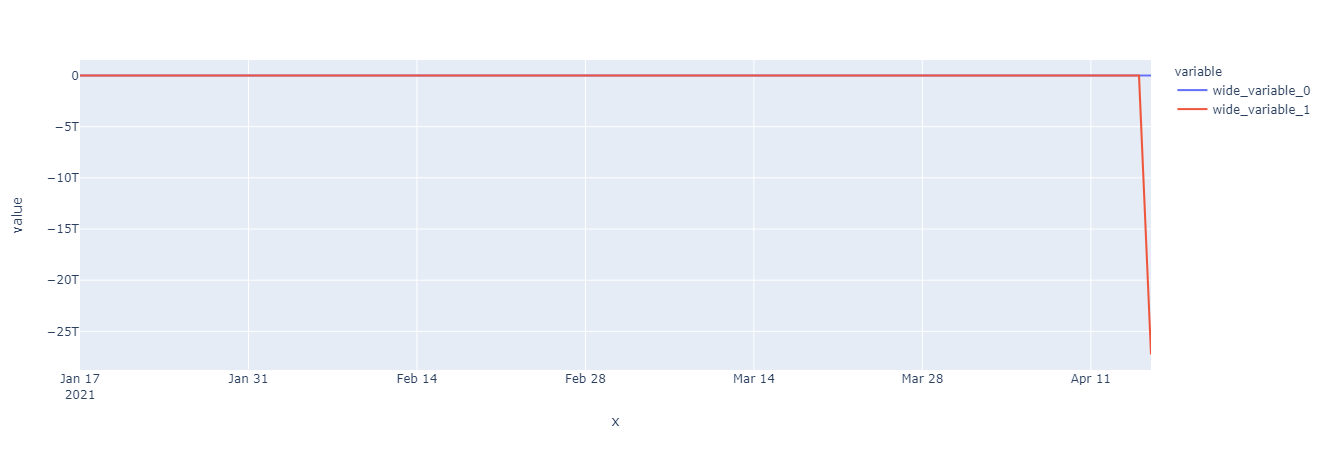

In [183]:
px.line(x=X_test_df.index, y = [test_norm[:, 0], y_pred])

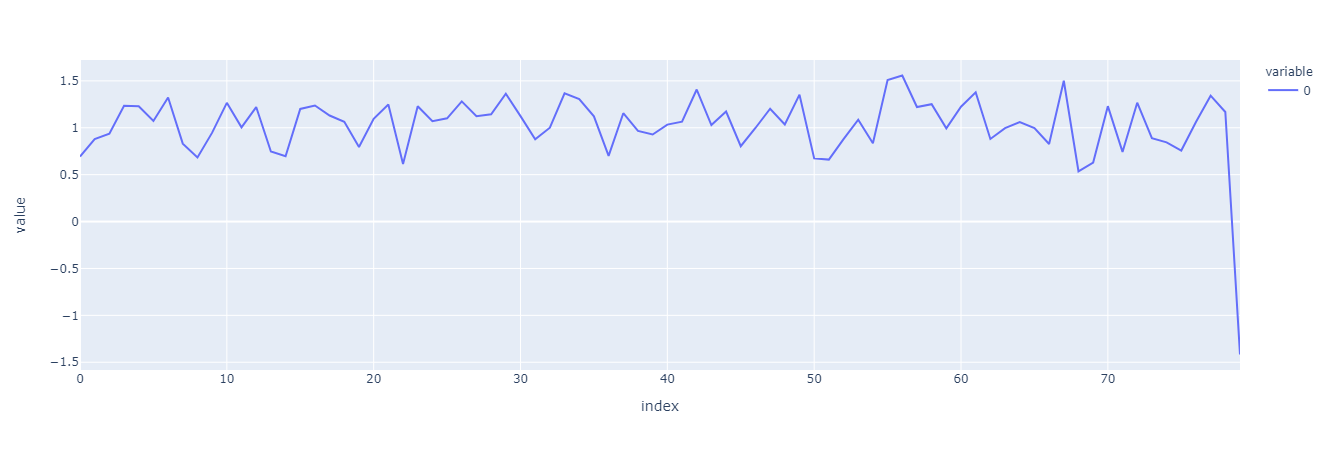

In [190]:
px.line(y_pred[:80])